In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.2697 - accuracy: 0.9226 - val_loss: 0.1322 - val_accuracy: 0.9619
Epoch 2/10
48000/48000 [==============================] - 3s 63us/step - loss: 0.1079 - accuracy: 0.9684 - val_loss: 0.1011 - val_accuracy: 0.9692
Epoch 3/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.0711 - accuracy: 0.9781 - val_loss: 0.0948 - val_accuracy: 0.9718
Epoch 4/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.0514 - accuracy: 0.9839 - val_loss: 0.0817 - val_accuracy: 0.9754
Epoch 5/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0808 - val_accuracy: 0.9750
Epoch 6/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0807 - val_accuracy: 0.9771
Epoch 7/10
48000/48000 [==============================] - 3s 64us/st

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

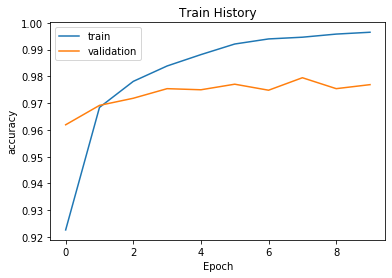

In [18]:
show_train_history(train_history,'accuracy','val_accuracy')

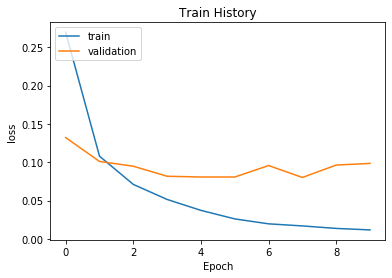

In [15]:
show_train_history(train_history,'loss','val_loss')

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 23us/step

accuracy= 0.977400004863739


In [20]:
#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [21]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.2354 - accuracy: 0.9297 - val_loss: 0.1450 - val_accuracy: 0.9545
Epoch 2/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.0916 - accuracy: 0.9715 - val_loss: 0.0986 - val_accuracy: 0.9720
Epoch 3/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0997 - val_accuracy: 0.9707
Epoch 4/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.0465 - accuracy: 0.9845 - val_loss: 0.0890 - val_accuracy: 0.9743
Epoch 5/10
48000/48000 [==============================] - 4s 77us/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.0992 - val_accuracy: 0.9737
Epoch 6/10
48000/48000 [==============================] - 4s 89us/step - loss: 0.0303 - accuracy: 0.9898 - val_loss: 0.1156 - val_accuracy: 0.9724
Epoch 7/10
48000/48000 [==============================] - 5s 94us/st

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

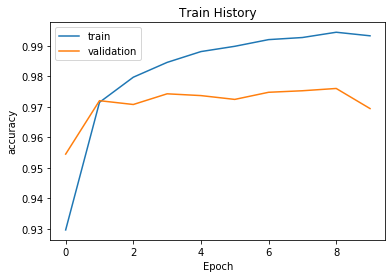

In [25]:
show_train_history(train_history,'accuracy','val_accuracy')

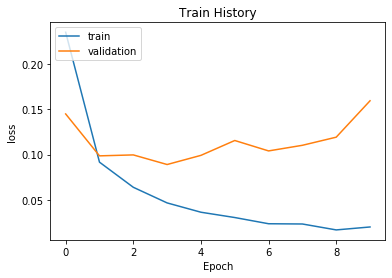

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 28us/step

accuracy= 0.9745000004768372
